**#####################################################################**<br></br>
EHS Integration and Engineering Solutions<br></br>
COVID-19 data analysis - https://github.com/ehsintegration/COVID-19<br></br>
To evaluate an In[] cell, Click on the cell, and press shift-enter.<br></br>
**#####################################################################**<br></br>

In [125]:
%matplotlib notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pyqtgraph as pg

In [2]:
1+1 

2

#####################################################################<br></br>
The following is how you import an object<br></br>
This object lets you access files from the GITHUB repository of files<br></br>
its where all of the COVID-19 data is kept<br></br>
<br></br>
What is GITHUB : https://en.wikipedia.org/wiki/GitHub<br></br>
<br></br>
Documentation  : https://pygithub.readthedocs.io/en/latest/<br></br>
#####################################################################<br></br>

In [3]:
from github import Github

#####################################################################<br></br>
created. This object will represent the github object that we will use<br></br>
to pull data from the github repository. You will be able to pull data<br></br>
from your own personal repository, or any repository that exits in<br></br>
github.<br></br>
<br></br>
This object will be used to access any file or directory within the<br></br>
github "filesystem".<br></br>
<br></br>
For this access to occur you need to insert your personal github<br></br>
username and password. If you dont have one, you would need to creat a<br></br>
github account. Please note that the fields below are exactly what<br></br>
you would enter when prompted when logging into the github site.<br></br>
#####################################################################<br></br>

In [4]:
#g = Github("username", "password")

#####################################################################<br></br>
In the following command we create another object called<br></br>
repo (short for repository of files), and assign it to a specific <br></br>
repository. Specifically the John Hopikns repository located at: <br></br>
https://github.com/CSSEGISandData/COVID-19<br></br>
#####################################################################<br></br>

In [57]:
repo = g.get_repo("CSSEGISandData/COVID-19")

#####################################################################<br></br>
Here, we are getting the list of all the contents in the repository<br></br>
for COVID-19, and then listing all of the directories and files:<br></br>
    <br></br>
The following will list all of the contents of <br></br>
the https://github.com/CSSEGISandData/COVID-19 repository of files.<br></br>
#####################################################################<br></br>

In [58]:
contents = repo.get_contents("")

#####################################################################<br></br>
The oblect contents is now created, and it is a list of files and<br></br>
directories. These are stored in what is called a list.<br></br>
#####################################################################<br></br>

In [59]:
print(contents)

[ContentFile(path=".gitignore"), ContentFile(path="README.md"), ContentFile(path="archived_data"), ContentFile(path="csse_covid_19_data"), ContentFile(path="who_covid_19_situation_reports")]


#####################################################################<br></br>
Next, we have the python syntax to iterate through all of the members<br></br>
of the list, one at a time, index is the variable used to iterate.<br></br>
#####################################################################<br></br>

In [60]:
for index in contents:
    print(index)

ContentFile(path=".gitignore")
ContentFile(path="README.md")
ContentFile(path="archived_data")
ContentFile(path="csse_covid_19_data")
ContentFile(path="who_covid_19_situation_reports")


#####################################################################<br></br>
Get the list of files from the directory that we are interested in.<br></br>
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports<br></br>
The files in this directory contains all of the data in CSV comma seperated<br></br>
file. There is a file for each day, and each line represents the amounts<br></br>
measured and reported for that day. Click on the link above, and explore<br></br>
the contents of each file. You will see the reporting structure for each <br></br>
line. The object contents below, will contain a list of all of the files.<br></br>
We will once again iterate with the index variable, and use it to iterate <br></br>
over all of the files in the directory.<br></br>
#####################################################################<br></br>

In [61]:
contents = repo.get_contents("csse_covid_19_data/csse_covid_19_daily_reports")

In [62]:
count = 1
for index in contents:
    url = index.download_url
    print(count, url)
    count = count + 1

1 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/.gitignore
2 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
3 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
4 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
5 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
6 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
7 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
8 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_d

#####################################################################<br></br>
Here we are pulling in another object called BS4, which stands for<br></br>
Beautiful Soup 4. We will use the Beautiful Soup Object to fetch web data. <br></br>
Beautiful soup is normally used to parse HTML, but we are just using <br></br>
it to download the file and convert it to a string. We will be using the<br></br>
list of urls for each file above to download all of the files into one<br></br>
long array of lines. This long array will have all of the line entries<br></br>
for all of the files concatenated together. <br></br>
Note, that we have a check below to ensure, that we only use files that <br></br>
have the .csv extension.<br></br>
<br></br>
The next section will create an array of files in an object called files.<br></br>
#####################################################################<br></br>

In [63]:
import bs4 as bs
import urllib.request

In [64]:
# all_data will be an array of lines that will contain all of the data.
# we are clearing the array here.
all_data = []
files    = []

days     = 0

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (".csv" in url):
        print(url)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        decoded_data = source.decode("utf-8")
        
        files.append(decoded_data)   
        days = days + 1

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-31-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

#####################################################################<br></br>
Print a file from the file list. files[0] is the first file, and file[1]<br></br>
is the second file. It should correlate to the second link listed above.<br></br>
#####################################################################<br></br>

In [68]:
print(files[len(files)-1])

FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
45001,Abbeville,South Carolina,US,2020-04-04 23:34:21,34.22333378,-82.46170658,6,0,0,0,"Abbeville, South Carolina, US"
22001,Acadia,Louisiana,US,2020-04-04 23:34:21,30.295064899999996,-92.41419698,65,2,0,0,"Acadia, Louisiana, US"
51001,Accomack,Virginia,US,2020-04-04 23:34:21,37.76707161,-75.63234615,8,0,0,0,"Accomack, Virginia, US"
16001,Ada,Idaho,US,2020-04-04 23:34:21,43.4526575,-116.24155159999998,360,3,0,0,"Ada, Idaho, US"
19001,Adair,Iowa,US,2020-04-04 23:34:21,41.33075609,-94.47105874,1,0,0,0,"Adair, Iowa, US"
21001,Adair,Kentucky,US,2020-04-04 23:34:21,37.10459774,-85.28129668,3,0,0,0,"Adair, Kentucky, US"
29001,Adair,Missouri,US,2020-04-04 23:34:21,40.19058551,-92.60078167,10,0,0,0,"Adair, Missouri, US"
40001,Adair,Oklahoma,US,2020-04-04 23:34:21,35.88494195,-94.65859267,14,0,0,0,"Adair, Oklahoma, US"
08001,Adams,Colorado,US,2020-04-04 23:34:21,39.87432092,-104.336257

#####################################################################<br></br>
This routine below, create three dictionaries, that will be used later.<br></br>
<br></br>
The first is conf_dict: <br></br>
  This dictionary uses the reporting city/location as an index, and a<br></br>
  list of value pairs [sample day number, value], [s2.v2], ...., the value<br></br>
  stored is the number of confirmed reports per location.<br></br>
The second is death_dict:<br></br> 
  This dictionary uses the reporting city/location as an index, and a<br></br>
  list of value pairs [sample day number, value], [s2.v2], ...., the value<br></br>
  stored is the number of death reports per location.<br></br>
The third dictionary is country_dictionary:<br></br>
  This disctionary uses the reporting city/location as an index, and a<br></br>
  list of value pairs [sample day number, value], [s2.v2], ...., the value<br></br>
  is initialized to zero. This is just used to maintain a list of reporting<br></br>
  locations. <br></br>
<br></br>
Since, the cumlative totals are per city. We will create three <br></br>
dictionaries, that will have the city as an index, and contain the total<br></br>
confirmed and death for that city. We will later iterate through all<br></br> 
of the cities in a day, in order to calculate the true running total.<br></br>
#####################################################################<br></br>

In [14]:
# This function is used to modifiy a string where a comma exists between to quotes
# ["Miami,Fl",US,2,3,4,6] becomes ["Miami Fl",US,2,3,4,6]
#
# This is needed because there are fields in the CSV file with commas,
# and this throws off the array split function
#
# Function : StringFix
def strfix(value):
    nl = ''
    flag = bool(False)
    for i in range(0,len(value)):
        if (value[i].find('"')>=0):
            flag = not(bool(flag))            
        if( (value[i]==",") and (flag==True) ):
            nl = nl + ' '
        else:
            nl = nl + value[i]             
    return(nl)

In [15]:
# Dictionaries
#
conf_dict     = {}   # dictionary of confirmed per city
death_dict    = {}   # dictionary of deaths per city
rec_dict      = {}
country_dict  = {}

sample = 0

# Collect postion vs confirmation
lat         = []
lon         = []
con         = []

# Print Sample events of death reporting
#
for index in range(0,len(files)):
        
    # Take the long string and split it for every newline character \n
    file = files[index].split('\n')
       
    CNT        = 0 
    state      = 0
    confirmed  = 0
    death      = 0
    recovered  = 0
    date       = 0
    latitude   = 0
    longitude  = 0  
    
    # Now iterate for every line in the array called "array"
    for line in file: 
        
        # Use the first line for index location, this is highly needed
        # because the location of the reuired elements changes throughout time
        # in the files, and is not consistent.
        if (line.find("Confirmed")>=0):
            newline = line.strip('\r')
                     
            newline = strfix(newline)
            data = newline.split(',')
            
            new_fields = len(data)
                     
            for i in range(0,new_fields):
                if (data[i].find("Country")>=0): 
                    CNT        = i 
                elif (data[i].find("State")>=0): 
                    state      = i
                elif (data[i].find("Confirmed")>=0): 
                    confirmed  = i
                elif (data[i].find("Death")>=0): 
                    death      = i
                elif (data[i].find("Recovered")>=0): 
                    recovered  = i
                elif (data[i].find("Update")>=0): 
                    date       = i
                elif (data[i].find("Lat")>=0): 
                    latitude   = i
                elif (data[i].find("Long")>=0): 
                    longitude  = i   
                             
        # Make sure its not the first line that has a text header and no valuable data
        else:
                
            # Remove any \r delimiter characters. Google what \r and \n are
            # used for. Traditionaly they are used to indicate the end of a line.
            # Sometimes only one is used, and sometimes both are used. In this
            # case they are both used, and we already split the lines based on \n
            # which means we need to strip the special character from each line.
            newline = line.strip('\r')
                
            # Finally append the new line to the array called all_data
            newline = strfix(newline)
            data = newline.split(',')
            
            #print(data)
            #print(len(data))
            
            if (len(data)>=6):
                
                # Correct all of the running name chnages that have occurred over time.
                #
                # China was renamed from "Mainland China" to "China"
                # This corrects that.
                cnt = data[CNT]
                if ("China" in cnt) : cnt = "China"
                if ("Kong" in cnt)  : cnt = "China"
                if ("Korea" in cnt) : cnt = "South Korea"
                    
                key = cnt + "-" + str(data[state])
                
                # Build country dictionary, will latter be forced to fix size
                # what is pushed is not important
                country_dict.setdefault(cnt, []).append(0)
                  
                # Does the confirmed field have a number, sometimes it is '', empty
                if(len(data[confirmed]) > 0):
                    # Is the number greater than zero
                    if (int(data[confirmed]) > 0):
                        conf_dict.setdefault(key, []).append([sample,int(data[confirmed])])
                    else:
                        conf_dict.setdefault(key, []).append([sample,0])
                else:
                    conf_dict.setdefault(key, []).append([sample,0])
                    
                # Does the death field have a number, sometimes it is '', empty
                if(len(data[death]) > 0):
                    # Is the number greater than zero
                    if (int(data[death]) > 0):
                        death_dict.setdefault(key, []).append([sample,int(data[death])])
                    else:
                        death_dict.setdefault(key, []).append([sample,0]) 
                else:
                    death_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does the recovered field have a number, sometimes it is '', empty
                if(len(data[recovered]) > 0):
                    # Is the number greater than zero
                    if (int(data[recovered]) > 0):
                        rec_dict.setdefault(key, []).append([sample,int(data[recovered])])
                    else:
                        rec_dict.setdefault(key, []).append([sample,0]) 
                else:
                    rec_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does Latitude have a valid positive number for continental US only
                if ((len(data[longitude]) > 0) and (longitude > 0) ):
                              
                    # Does Longitude have a negative number for continental US only
                    if (float(data[longitude]) < 0.0):  # eliminate Guam
                    
                        # Append data to arrays. We have an Array for Number Confirmed, Latitude, and Longitude
                        # The number confirmed will be used for the size of the red dot.
                        con.append(float(data[confirmed]))
                        lat.append(float(data[latitude]))
                        lon.append(float(data[longitude]))
                    
    sample = sample + 1


#####################################################################<br></br>
The section traverses all of the dictionaries and calculates three <br></br>
additional dictionaries. The three dictionaries use the country as the<br></br>
index. Therefore, all of the city subtotals are added, to obtain a list <br></br>
of a single country total, for each day.<br></br>

The three dictionary of lists are for confirmed, death and percent.<br></br>

Please review the data produced. Notice that some of the locations stopped<br></br>
reporting, and have subsequent zeros. This is because the reportng structure <br></br>
has changed over time. For Hong Kong went from an independant report, and<br></br>
moved to a subtotal of China as a whole.<br></br>
#####################################################################<br></br>

In [69]:
state_conf_dict    = {}
state_death_dict   = {}

country_conf_dict  = {}
country_death_dict = {}
country_rec_dict   = {}
country_perc_dict  = {} 

Dcountry_conf_dict  = {}
Dcountry_death_dict = {}
Dcountry_rec_dict   = {}
Dcountry_perc_dict  = {} 

print(days)
    
# Reset totals for country dictionary
for city in conf_dict:
    state_conf_dict[city]   = np.zeros(days)
    state_death_dict[city]  = np.zeros(days)

for CNT in country_dict:
    country_conf_dict[CNT]  = np.zeros(days)  
    country_death_dict[CNT] = np.zeros(days)
    country_rec_dict[CNT]   = np.zeros(days)
    country_perc_dict[CNT]  = np.zeros(days)
    
# Reset totals for country dictionary
for CNT in country_dict:
    Dcountry_conf_dict[CNT]  = np.zeros(days-1)  
    Dcountry_death_dict[CNT] = np.zeros(days-1)
    Dcountry_rec_dict[CNT]   = np.zeros(days-1)
    Dcountry_perc_dict[CNT]  = np.zeros(days-1)
   
# Daily total for all of the cities summed together
for city in conf_dict:
    CNT = city.split('-')[0]
     
    if (CNT in country_dict):
        for i in range(0,len(conf_dict[city])):
            cs = conf_dict[city][i][0]
            cv = conf_dict[city][i][1] 
            ds = death_dict[city][i][0]
            dv = death_dict[city][i][1] 
            rs = rec_dict[city][i][0]
            rv = rec_dict[city][i][1] 
            country_conf_dict[CNT][ cs ] = int(country_conf_dict[CNT][ cs ]) + int( cv )
            country_death_dict[CNT][ ds ] = int(country_death_dict[CNT][ ds ]) + int( dv )
            country_rec_dict[CNT][ rs ] = int(country_rec_dict[CNT][ rs ]) + int( rv )
    
            if ("US" in CNT):
                state_conf_dict[city][ cs ] = int(state_conf_dict[city][ cs ]) + int( cv )
                state_death_dict[city][ ds ] = int(state_death_dict[city][ ds ]) + int( dv )
        

# Look for unreported gaps is extend last measurement
# ....106. 108. 147. 171. 171. 171. 348.] becomes
# ....106. 108. 147. 171.  0.    0. 348.]
#
for CNT in country_dict:
    for i in range(0,len(country_rec_dict[CNT])):
        if (country_rec_dict[CNT][i] == 0) and (country_rec_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found recovered gaps for " + CNT + ", and corrected" )
             country_rec_dict[CNT][ i ] = country_rec_dict[CNT][ (i - 1) ]
        if (country_conf_dict[CNT][i] == 0) and (country_conf_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_conf_dict[CNT][ i ] = country_conf_dict[CNT][ (i - 1) ]
        if (country_death_dict[CNT][i] == 0) and (country_death_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_death_dict[CNT][ i ] = country_death_dict[CNT][ (i - 1) ]

# Calculate the percent death rate over time
#
for CNT in country_dict:
    for i in range(0,len(country_perc_dict[CNT])):
        # Check to avoid divde by zero
        if (country_conf_dict[CNT][i] > 0.0):
            country_perc_dict[CNT][i] = (country_death_dict[CNT][i] / country_conf_dict[CNT][i]) * 100.0
        else:
            country_perc_dict[CNT][i] = 0.0
   
# Calc Derivatives 
#
for CNT in country_dict:
    for i in range(1,len(country_rec_dict[CNT])):
        Dcountry_rec_dict[CNT][ i-1 ]   = (country_rec_dict[CNT][ i ]   - country_rec_dict[CNT][ i-1 ]) 
        Dcountry_conf_dict[CNT][ i-1 ]  = (country_conf_dict[CNT][ i ]  - country_conf_dict[CNT][ i-1 ])  
        Dcountry_death_dict[CNT][ i-1 ] = (country_death_dict[CNT][ i ] - country_death_dict[CNT][ i-1 ]) 
        Dcountry_perc_dict[CNT][ i-1 ]  = (country_perc_dict[CNT][ i ]  - country_perc_dict[CNT][ i-1 ])  


# Display the data
#
for CNT in country_dict:
    print(CNT)
    print(country_conf_dict[CNT])
    print(country_death_dict[CNT])
    print(country_rec_dict[CNT])
    print(country_perc_dict[CNT])   

74
China
[  547.   641.   918.  1404.  2070.  2871.  5502.  6080.  8134.  9795.
 11884. 16622. 19708. 23697. 27430. 30577. 34100. 36804. 39819. 42344.
 44376. 44749. 59885. 66348. 68403. 70503. 72424. 74201. 74609. 75067.
 75540. 76991. 77012. 77231. 77744. 78156. 78590. 78918. 79346. 79922.
 80126. 80251. 80376. 80527. 80680. 80760. 80813. 80850. 80877. 80921.
 80932. 80945. 80977. 81003. 81033. 81058. 81102. 81156. 81250. 81305.
 81397. 81496. 81591. 81661. 81782. 81897. 81999. 82122. 82198. 82279.
 82361. 82432. 82432. 82432.]
[  17.   18.   26.   42.   56.   82.  131.  133.  171.  213.  259.  361.
  425.  491.  563.  633.  718.  805.  905. 1012. 1112. 1117. 1369. 1521.
 1663. 1766. 1864. 2003. 2116. 2238. 2238. 2443. 2445. 2595. 2665. 2717.
 2746. 2790. 2837. 2872. 2914. 2947. 2983. 3015. 3044. 3072. 3100. 3123.
 3139. 3161. 3172. 3180. 3193. 3203. 3217. 3230. 3241. 3249. 3253. 3259.
 3265. 3274. 3281. 3285. 3291. 3296. 3299. 3304. 3308. 3309. 3316. 3322.
 3322. 3322.]
[2.8000e+01 

 188. 196. 196. 196.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Martinique
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  2.  3.  3.  3.  9.  9.
 15. 16. 19. 23. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32

 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Belize
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3.
 3. 3.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

In [17]:
print(rec_dict['US-"Hillsborough  FL"'])
#print(rec_dict.keys())
print(country_rec_dict['US'])

[[40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0]]
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00 3.000e+00
 3.000e+00 3.000e+00 5.000e+00 5.000e+00 5.000e+00 5.000e+00 6.000e+00
 6.000e+00 6.000e+00 7.000e+00 7.000e+00 7.000e+00 7.000e+00 8.000e+00
 8.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00 8.000e+00
 8.000e+00 1.200e+01 1.200e+01 1.200e+01 1.200e+01 1.700e+01 1.700e+01
 1.060e+02 1.080e+02 1.470e+02 1.710e+02 1.710e+02 1.710e+02 3.480e+02
 3.610e+02 6.810e+02 8.690e+02 1.072e+03 2.665e+03 5.644e+03 7.024e+03
 8.474e+03 9.001e+03]


In [70]:
# Print the total number of reporting days we have
print(days)

74


#####################################################################<br></br>
<br></br>
This section plot the death rate data for each country<br></br>
<br></br>
#####################################################################<br></br>

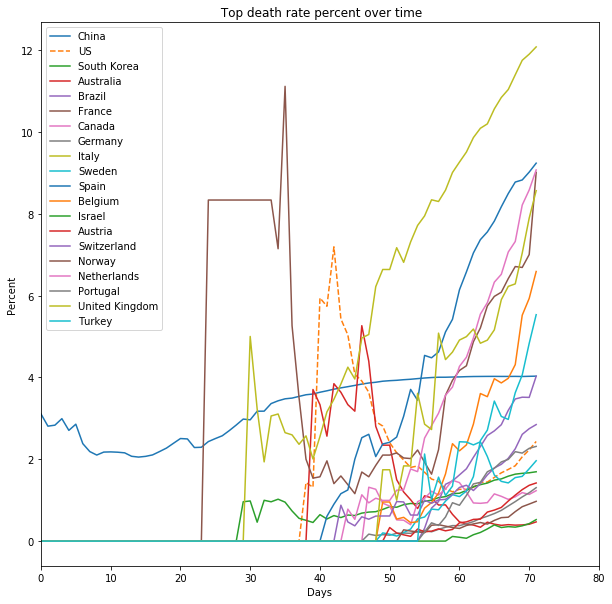

In [55]:
fig, ax = plt.subplots(figsize = (10,10))  
ax.set_xlim(0, days+8)
ax.set_title(" Top death rate percent over time")
ax.set_ylabel("Percent")
ax.set_xlabel("Days")

exclude_list = ['Iran', 'Iran (Islamic Republic of)']   
    
# Daily total for all of the cities summed together
for CNT in country_conf_dict: 
    if (country_conf_dict[CNT][days-1] > 5000) and not(str(exclude_list).find(CNT)>=0):
        #if ("US" in CNT):
            x = range(0,len(country_perc_dict[CNT]))
            y = country_perc_dict[CNT] 
            if ("US" in CNT):
                ax.plot(x,y, label=CNT, linestyle="--")
            else:
                ax.plot(x,y, label=CNT)
            ax.grid
    
plt.legend(loc="upper left")



#####################################################################<br></br>
<br></br>
This section extrapolates the confirmed from the death, and is used<br></br>
to find at what rate can I preduct the confirmed from the death data<br></br>
<br></br>
#####################################################################<br></br>

China
US
Italy


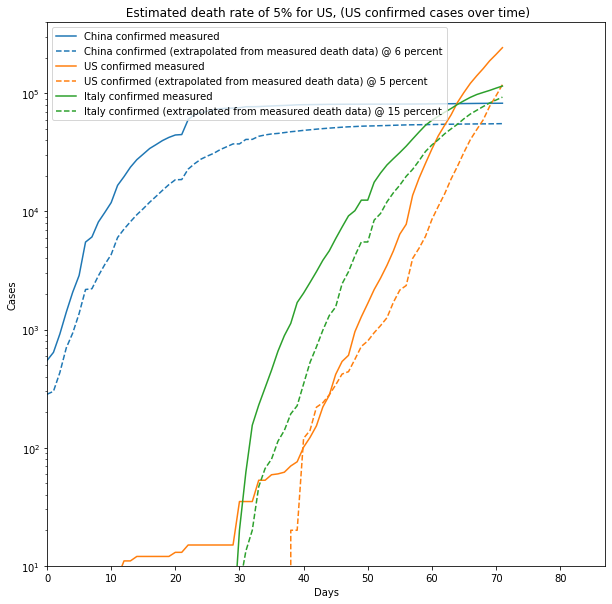

In [51]:
infected_per = {}
for CNT in country_dict:
    infected_per[CNT]  = np.zeros(days) 

infected_per['Italy']        = 15
infected_per['China']        = 6
infected_per['US']           = 5
infected_per['South Korea']  = 4
infected_per['France']       = 15
infected_per['UK']           = 1.5

include_list = ['US', 'Italy', 'China']

# ##########################################################################

fig, ax = plt.subplots(figsize = (10,10))  
ax.set_xlim(0, days+15)
ax.set_ylim(10, 400000)
ax.set_title(" Estimated death rate of " + str(infected_per['US']) +"% for US, (US confirmed cases over time)")
ax.set_ylabel("Cases")
ax.set_xlabel("Days")
ax.set_yscale('log', basey=10) 
                        
# Daily total for all of the cities summed together
for CNT in country_conf_dict: 
        if (CNT in include_list):
            print(CNT)
            x = range(0,len(country_perc_dict[CNT]))
            y1 = country_conf_dict[CNT] 
            lbl = CNT + " confirmed measured"
            line, = ax.plot(x,y1, label=lbl) 
            y2 = []
            for i in range(0,len(country_death_dict[CNT])):
                y2.append(country_death_dict[CNT][i] / ( float(infected_per[CNT])/100.0))
            lbl = CNT + " confirmed (extrapolated from measured death data) @ " + str(infected_per[CNT]) + " percent"
            ax.plot(x,y2, color=line.get_color(), label=lbl, linestyle='--')
            ax.grid
    
plt.legend(loc="upper left")  